In [ ]:
from google.colab import files
uploaded = files.upload()  # This will let you select the zip file from your computer


Saving archive (3).zip to archive (3).zip


In [ ]:
!unzip "archive (3).zip" -d dataset


Archive:  archive (3).zip
  inflating: dataset/Covid19-dataset/test/Covid/0100.jpeg  
  inflating: dataset/Covid19-dataset/test/Covid/0102.jpeg  
  inflating: dataset/Covid19-dataset/test/Covid/0105.png  
  inflating: dataset/Covid19-dataset/test/Covid/0106.jpeg  
  inflating: dataset/Covid19-dataset/test/Covid/0108.jpeg  
  inflating: dataset/Covid19-dataset/test/Covid/0111.jpg  
  inflating: dataset/Covid19-dataset/test/Covid/0112.jpg  
  inflating: dataset/Covid19-dataset/test/Covid/0113.jpg  
  inflating: dataset/Covid19-dataset/test/Covid/0115.jpeg  
  inflating: dataset/Covid19-dataset/test/Covid/0118.jpeg  
  inflating: dataset/Covid19-dataset/test/Covid/0119.jpeg  
  inflating: dataset/Covid19-dataset/test/Covid/0120.jpg  
  inflating: dataset/Covid19-dataset/test/Covid/094.png  
  inflating: dataset/Covid19-dataset/test/Covid/096.png  
  inflating: dataset/Covid19-dataset/test/Covid/098.jpeg  
  inflating: dataset/Covid19-dataset/test/Covid/COVID-00003b.jpg  
  inflating: data

In [ ]:
!ls dataset


Covid19-dataset


In [ ]:
!ls "dataset/Covid19-dataset"


test  train


In [ ]:
train_path = "dataset/Covid19-dataset/train"
test_path = "dataset/Covid19-dataset/test"


In [ ]:
import cv2
import os
import numpy as np

def load_images(path):
    images = []
    labels = []
    for folder_name in os.listdir(path):
        folder_path = os.path.join(path, folder_name)
        if os.path.isdir(folder_path):
            for file_name in os.listdir(folder_path):
                img_path = os.path.join(folder_path, file_name)
                img = cv2.imread(img_path)
                if img is not None:
                    img = cv2.resize(img, (128, 128))  # resize all images
                    images.append(img)
                    labels.append(folder_name)
    return np.array(images), np.array(labels)

# Load train and test images
X_train, y_train = load_images(train_path)
X_test, y_test = load_images(test_path)

print("Train images:", X_train.shape)
print("Train labels:", y_train.shape)
print("Test images:", X_test.shape)
print("Test labels:", y_test.shape)
print("Classes:", np.unique(y_train))


Train images: (251, 128, 128, 3)
Train labels: (251,)
Test images: (66, 128, 128, 3)
Test labels: (66,)
Classes: ['Covid' 'Normal' 'Viral Pneumonia']


In [ ]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

# Normalize images
X_train = X_train / 255.0
X_test = X_test / 255.0

# Encode labels
le = LabelEncoder()
y_train_enc = to_categorical(le.fit_transform(y_train))
y_test_enc = to_categorical(le.transform(y_test))

print("Encoded labels shape:", y_train_enc.shape)


Encoded labels shape: (251, 3)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(128,128,3)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')  # 3 classes
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,305,027 (12.61 MB)

 Trainable params: 3,305,027 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#train the model
history = model.fit(
    X_train, y_train_enc,
    validation_data=(X_test, y_test_enc),
    epochs=10,  # You can increase if needed
    batch_size=16
)


Epoch 1/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 502ms/step - accuracy: 0.4141 - loss: 1.2322 - val_accuracy: 0.8788 - val_loss: 0.6494
Epoch 2/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 10s 576ms/step - accuracy: 0.7267 - loss: 0.6414 - val_accuracy: 0.8182 - val_loss: 0.3742
Epoch 3/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 8s 515ms/step - accuracy: 0.8727 - loss: 0.4236 - val_accuracy: 0.8030 - val_loss: 0.4095
Epoch 4/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 9s 454ms/step - accuracy: 0.9196 - loss: 0.2543 - val_accuracy: 0.8939 - val_loss: 0.2539
Epoch 5/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 8s 525ms/step - accuracy: 0.9249 - loss: 0.2125 - val_accuracy: 0.8939 - val_loss: 0.2481
Epoch 6/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 10s 527ms/step - accuracy: 0.9342 - loss: 0.1544 - val_accuracy: 0.7727 - val_loss: 0.5211
Epoch 7/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 7s 445ms/step - accuracy: 0.9222 - loss: 0.1611 - val_accuracy: 0.8636 - val_loss: 0.2416
Epoch 8/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 8s 522ms/step - accuracy: 0.9048 - loss: 0.2282 - val_accuracy:

In [ ]:
#evaluate the model
loss, accuracy = model.evaluate(X_test, y_test_enc)
print("Test Accuracy:", accuracy)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step - accuracy: 0.8806 - loss: 0.2285
Test Accuracy: 0.8939393758773804


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 526ms/step


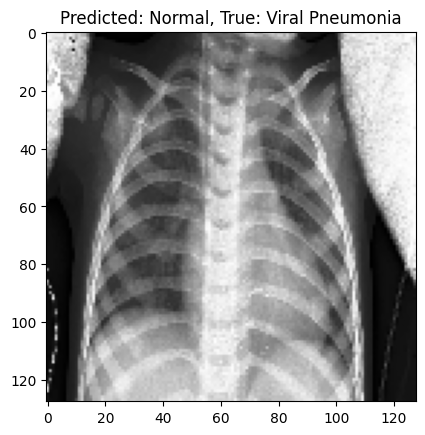

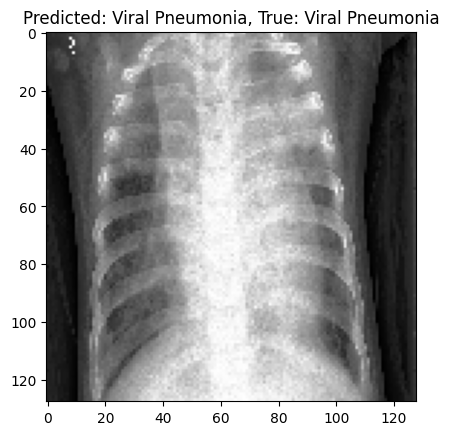

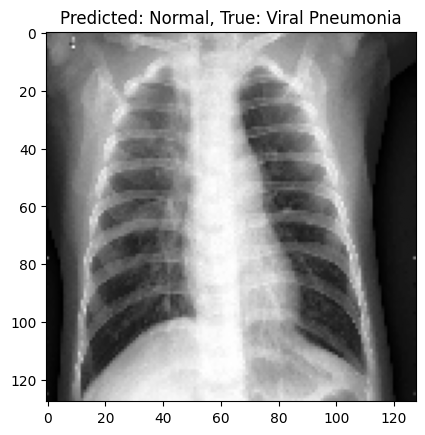

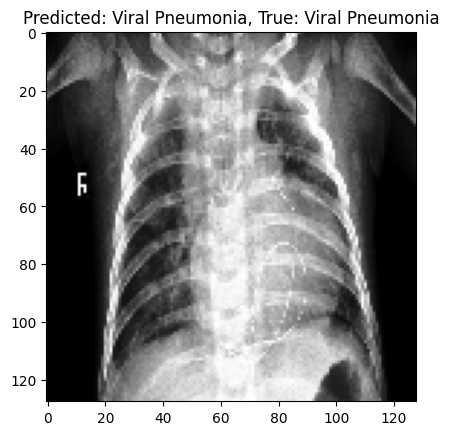

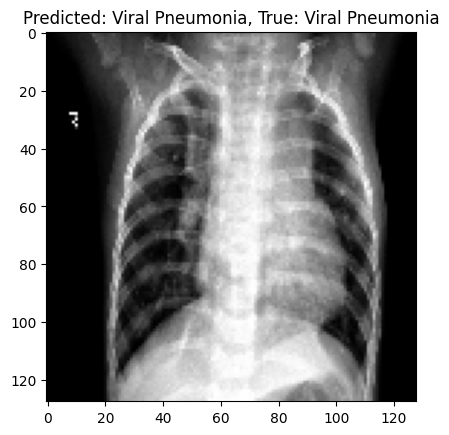

In [ ]:
#visualize predictions
import matplotlib.pyplot as plt

preds = model.predict(X_test)
pred_classes = preds.argmax(axis=1)
true_classes = y_test_enc.argmax(axis=1)

for i in range(5):
    plt.imshow(X_test[i])
    plt.title(f"Predicted: {le.inverse_transform([pred_classes[i]])[0]}, True: {le.inverse_transform([true_classes[i]])[0]}")
    plt.show()


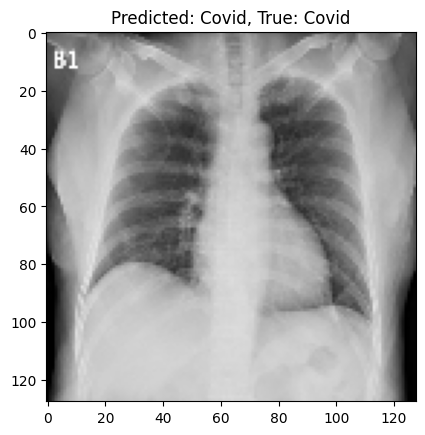

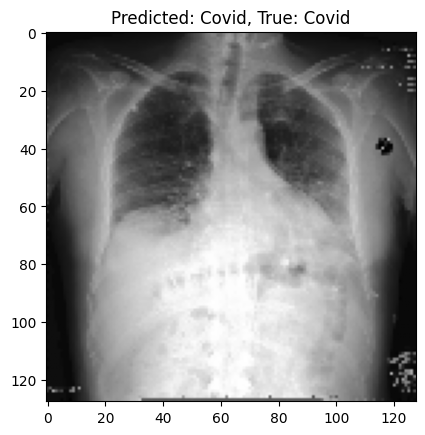

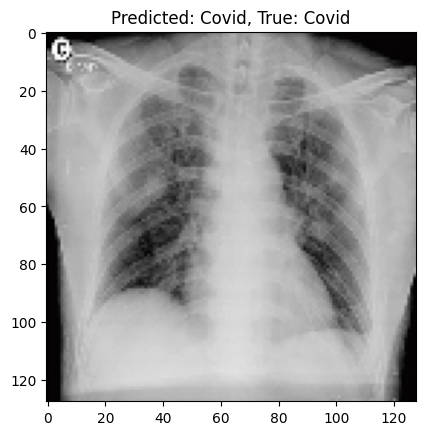

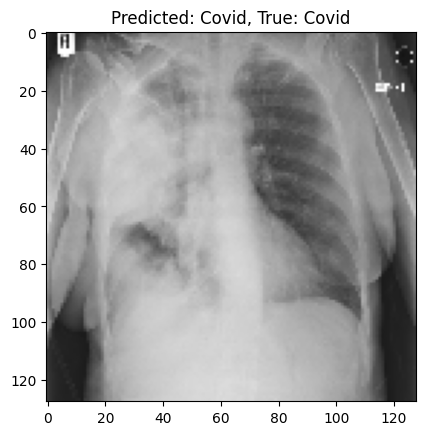

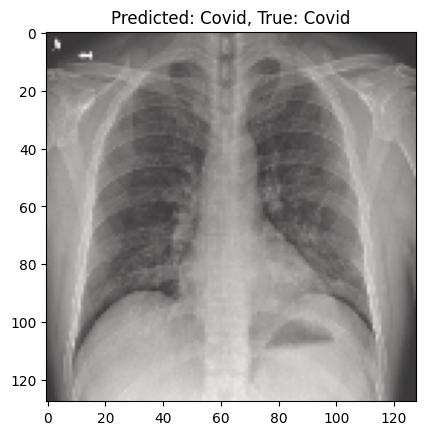

In [12]:
# Find indices of COVID images in test set
covid_indices = [i for i, label in enumerate(y_test) if label == 'Covid']

# Show first 5 COVID predictions
for i in covid_indices[:5]:
    plt.imshow(X_test[i])
    plt.title(f"Predicted: {le.inverse_transform([pred_classes[i]])[0]}, True: {y_test[i]}")
    plt.show()
